<a href="https://colab.research.google.com/github/AnupDesai/Other-Projects/blob/main/Histogram_equalization_and_Finding_the_shortest_path.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import time
img= cv2.imread("/content/wolves.png")

Enter space-separated integers: 1 0
Time Taken :  0.004189729690551758 ms


Text(0.5, 1.0, 'Histogram for color channel gray and case (1, 0)')

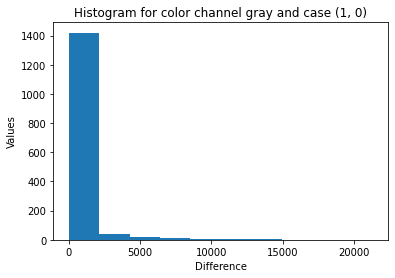

In [ ]:
def smoothness_prior_gray(img_gray,diff_tuple):
  sum=0
  res=[]
  x,y= diff_tuple[0], diff_tuple[1]
  for i in range (img_gray.shape[0]):
    for j in range(img_gray.shape[1]):
       x1,y1= x+i,y+j
       if x1<img_gray.shape[0] and y1<img_gray.shape[1]:
         sum=0
         if x1>=0 and y1>=0:
            sum = math.pow(int(img_gray[i][j])-int(img_gray[x1][y1]),2)
         res.append(sum)            
    return res

diff = input('Enter space-separated integers: ')
diff_tuple = tuple(int(item) for item in diff.split())
imgGRAY= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
starttime=time.time()
arr= smoothness_prior_gray(imgGRAY,diff_tuple)
endtime=time.time()
print('Time Taken : ',(endtime-starttime), "ms")
plt.hist(arr,bins=10)
plt.xlabel("Difference")
plt.ylabel("Values")
plt.title("Histogram for color channel {} and case {}".format("gray",diff_tuple))

In [ ]:
class calculate_smoothness:

  def __init__(self,img,img_shape,x,y):
    self.img_shape=img_shape
    self.x=x
    self.y=y
    self.img=img

  def smoothness_prior_1(self):
    res=[]
    for i in range (self.img_shape[0]):
      for j in range(self.img_shape[1]):
        x1,y1= self.x+i,self.y+j       
        if x1<self.img_shape[0] and y1<self.img_shape[1]:
          diff=0
          for k in range(self.img_shape[2]):
            diff += math.pow((int(self.img[i][j][k])- int(self.img[x1][y1][k])),2)
          res.append(diff)
    return res


Enter space-separated integers: 0 1
Time Taken :  3.7622199058532715 ms


Text(0.5, 1.0, 'Histogram for color channel RGB and case (0, 1)')

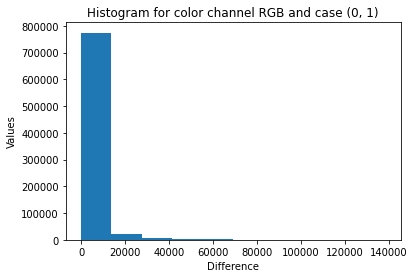

In [ ]:
diff = input('Enter space-separated integers: ')
diff_tuple = tuple(int(item) for item in diff.split())
imgRGB= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
smooth_obj=calculate_smoothness(imgRGB,imgRGB.shape,diff_tuple[0],diff_tuple[1])
starttime=time.time()
arr= smooth_obj.smoothness_prior_1()
endtime=time.time()
print('Time Taken : ',(endtime-starttime), "ms")
plt.hist(arr,bins=10)
plt.xlabel("Difference")
plt.ylabel("Values")
plt.title("Histogram for color channel {} and case {}".format("RGB",diff_tuple))
    

Enter space-separated integers: 0 1
Time Taken :  3.8165836334228516 ms


Text(0.5, 1.0, 'Histogram for color channel HSV and case (0, 1)')

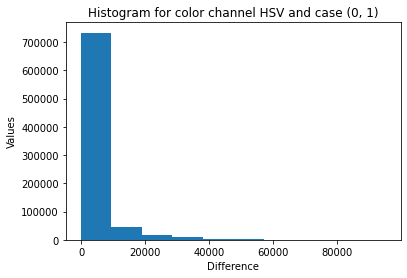

In [ ]:
diff = input('Enter space-separated integers: ')
diff_tuple = tuple(int(item) for item in diff.split())
imgHSV= cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
smooth_obj=calculate_smoothness(imgHSV,imgHSV.shape,diff_tuple[0],diff_tuple[1])
starttime=time.time()
arr= smooth_obj.smoothness_prior_1()
endtime=time.time()
print('Time Taken : ',(endtime-starttime), "ms")
plt.hist(arr,bins=10)
plt.xlabel("Difference")
plt.ylabel("Values")
plt.title("Histogram for color channel {} and case {}".format("HSV",diff_tuple))


Enter space-separated integers: 0 1
Time Taken :  3.9593663215637207 ms


Text(0.5, 1.0, 'Histogram for color channel LAB and case (0, 1)')

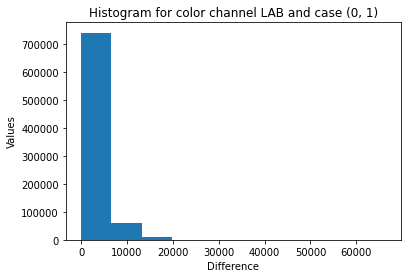

In [ ]:
diff = input('Enter space-separated integers: ')
diff_tuple = tuple(int(item) for item in diff.split())
img=np.asarray(img,np.float32)
imgLAB= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
smooth_obj=calculate_smoothness(imgLAB,imgLAB.shape,diff_tuple[0],diff_tuple[1])
starttime=time.time()
arr= smooth_obj.smoothness_prior_1()
endtime=time.time()
print('Time Taken : ',(endtime-starttime), "ms")
plt.hist(arr,bins=10)
plt.xlabel("Difference")
plt.ylabel("Values")
plt.title("Histogram for color channel {} and case {}".format("LAB",diff_tuple))


**PROBLEM 2**

In [ ]:
class Build_graph(object):
    def __init__(self):
        self.vertices=[]
        self.edges={}
    
    def extraNode(self,vertice):
        self.vertices.append(vertice)
        self.edges[vertice]=[]          
    
    def addEdge(self,edge):
        par=edge.parent()
        dest=edge.children()
        self.edges[par].append(dest)
    
    def append_children(self,child):
        return self.edges[child]
    
    def __str__(self):
        result=''
        for par in self.vertices:
            for final in self.edges[par]:
                result = result + '('+str(par.getFirstPixel())+','+str(par.getSecondPixel())+') -' + '('+ str(final.getFirstPixel())+','+str(final.getSecondPixel())+')\n'
        return result[:-1]
class Graph(Build_graph):
    def addEdge(self,edge):
        Build_graph.addEdge(self,edge)
        rev=GetEdgeData(edge.children(),edge.parent())
        Build_graph.addEdge(self,rev)  
class GetPixelData(object):
    def __init__(self,x,y,val):
        self.value=val
        self.x,self.y=x,y    
    def getFirstPixel(self):
        return self.x
    def getSecondPixel(self):
        return self.y
    def getIntValue(self):
        return self.value
    def __str__(self):
        return '('+str(self.x)+','+str(self.y)+'):'+str(self.value)
class GetEdgeData(object):
    def __init__(self,parent,child):
        self.par=parent
        self.child=child
    def parent(self):
        return self.par
    def children(self):
        return self.child       
def BFS(g,edge1,edge2):
    path=[edge1]
    Q=[path]
    while len(Q) !=0:
        temp = Q.pop(0)
        lastNode = temp[-1]
        if lastNode ==edge2:
            return temp
        n=g.append_children(lastNode)
        for next in n:
            if next not in temp:
                new = temp + [next]
                Q.append(new)
    return None
def shortestPath(path):
    result=''
    for i in range(len(path)):
        result=result +''.join(str(path[i]).split(':')[0])
        if i != len(path)-1:
            result=result + '-'
    return result

In [ ]:
def four_adjacency(k,g_array,V):
    for i in range(len(g_array)):
        j=i+1
        sumofnodes=0
        x,y=g_array[i].getFirstPixel(),g_array[i].getSecondPixel()
        int_value=g_array[i].getIntValue()
        Neigh4=[[x,y+1],[x,y-1],[x-1,y],[x+1,y]]
        while j<len(g_array) or sumofnodes==4:
            final=g_array[j].getFirstPixel()
            final_c=g_array[j].getSecondPixel()
            int_value1=g_array[j].getIntValue()
            if int_value in V and int_value1 in V:
                for egde in Neigh4:
                    if egde[0]==final and egde[1]==final_c:
                        k.addEdge(GetEdgeData(g_array[i],g_array[j]))
                        sumofnodes+=1
            j+=1                    
    return k
def m_connection(graph_edge,edges,V):
    for i in range(len(edges)):
        second_point=i+1
        r=edges[i].getFirstPixel()
        c=edges[i].getSecondPixel()
        int_value=edges[i].getIntValue()
        neigh4=[[r,c+1],[r,c-1],[r-1,c],[r+1,c]]
        while second_point<len(edges):
            r1=edges[second_point].getFirstPixel()
            c1=edges[second_point].getSecondPixel()
            int_value1=edges[second_point].getIntValue()
            flag1,flag2=0,0
            if int_value in V and int_value1 in V:
                for edj in neigh4:
                    if edj[0]==r1 and edj[1]==c1:
                        graph_edge.addEdge(GetEdgeData(edges[i],edges[second_point]))
                        flag1=1
                if flag1!=1:
                    neigh1,neighq=[[r+1,c+1],[r-1,c+1],[r+1,c-1],[r-1,c-1]],[[r1,c1+1],[r1,c1-1],[r1-1,c1],[r1+1,c1]]
                    for par in neigh1:
                        if par[0]==r1 and par[1]==c1:
                            flag2=1
                    if flag2==1:
                        list1=[]
                        for parent in neigh4:
                            if parent in neighq:
                                list1.append(parent)
                        length_edge=len(list1)
                        sum_node=0
                        while len(list1)!=0:
                            t=list1.pop(0)
                            for node in edges:
                                x=node.getFirstPixel()
                                y=node.getSecondPixel()
                                if t[0]==x and t[1]==y:
                                    int_value4=node.getIntValue()
                                    if int_value4 not in V:
                                        sum_node+=1
                        if sum_node==length_edge:
                            graph_edge.addEdge(GetEdgeData(edges[i],edges[second_point]))
            second_point=second_point + 1  
    return graph_edge
def eight_neighbors(k,g_array,V):
    for i in range(len(g_array)):
        secondPointer=i+1
        noofNodes=0
        x=g_array[i].getFirstPixel()
        y=g_array[i].getSecondPixel()
        int1=g_array[i].getIntValue()
        Neigh8=[[x,y+1],[x,y-1],[x-1,y],[x+1,y],
           [x+1,y+1],[x-1,y+1],[x+1,y-1],[x-1,y-1]]
        while secondPointer<len(g_array) or noofNodes==8:
            r=g_array[secondPointer].getFirstPixel()
            c=g_array[secondPointer].getSecondPixel()
            int2=g_array[secondPointer].getIntValue()
            if int1 in V and int2 in V:
                for point in Neigh8:
                    if point[0]==r and point[1]==c:
                        k.addEdge(GetEdgeData(g_array[i],g_array[secondPointer]))
                        noofNodes+=1
            secondPointer+=1  
    return k



In [ ]:
def check_path(arr,p,q,V,path_type):
    length=arr.shape
    edges=[]
    b,e=None, None
    for i in range(length[0]):
        for j in range(length[1]):
            edges.append(GetPixelData(i,j,arr[i,j]))
            if i==p[0] and j==p[1]:
                b=edges[-1]
            if i==q[0] and j==q[1]:
                e=edges[-1]    
    graph_obj=Graph()
    for n in edges:
        graph_obj.extraNode(n)     
    if path_type=='4':
        (graph,edge1,edge2)= four_adjacency(graph_obj,edges,V),b,e
    elif path_type=='8':
        (graph,edge1,edge2)= eight_neighbors(graph_obj,edges,V),b,e
    elif path_type=='m':
        (graph,edge1,edge2)= m_connection(graph_obj,edges,V),b,e
    path=BFS(graph,edge1,edge2)
    if path==None:
        print('No path')
    else:
        print("Shortest Path: ", shortestPath(path))
        print("Length of Shortest Path: ", len(path)-1)
           
if __name__ == '__main__':
    arr=np.array([[3, 1, 2, 1],[2, 2, 0, 2],[1, 2, 1, 1],[1, 0, 1, 2]])   
    p=[3,0]
    q=[0,3]
    V=[1,2]
    path_type=str(input("Please input 4 or 8 or m: "))
    starttime=time.time()
    check_path(arr,p,q,V,path_type)
    endtime=time.time()
    print('Time Taken: ',(endtime-starttime)*1000)

Please input 4 or 8 or m: m
Shortest Path:  (3,0)-(2,0)-(1,0)-(1,1)-(0,1)-(0,2)-(0,3)
Length of Shortest Path:  6
Time Taken:  3.6063194274902344
